## MAGMA experimnetations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from magma import MAGMA

### Common HP + Exponentiated Quadratic Kernel

In [2]:
t0 = 0
tN = 10 + 1e-3
N = 30
M = 5

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(30,)


In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
print(m0.shape)

(30,)


In [4]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
print(theta0)

[130.73263512   2.92056802]


In [5]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(30, 30)


In [6]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(30,)


In [7]:
Theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[136.22394905   4.90315355]
0.4103466520229011


In [8]:
Y = np.zeros((M, N))
for i in range(M):
    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, common_T)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(N)
    Yi = np.random.multivariate_normal(mu0, Psi_Theta_Sigma)
    Y[i] = Yi
print(Y.shape)

(5, 30)


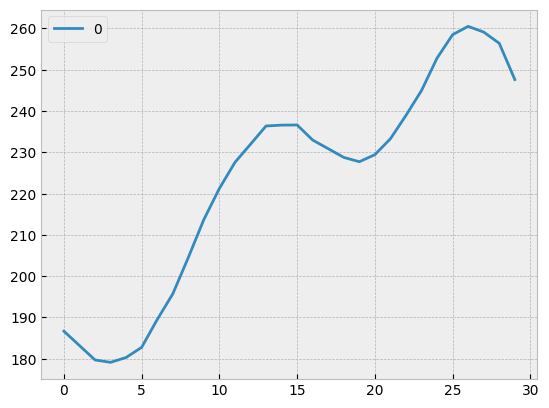

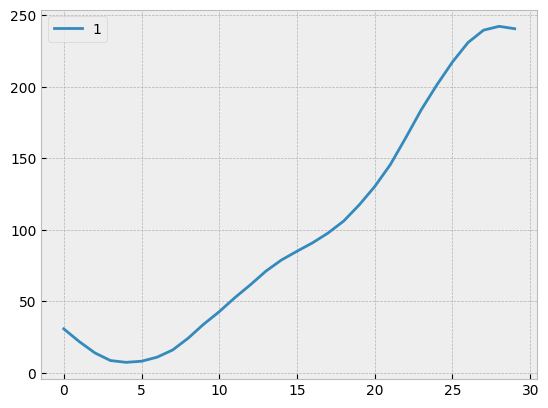

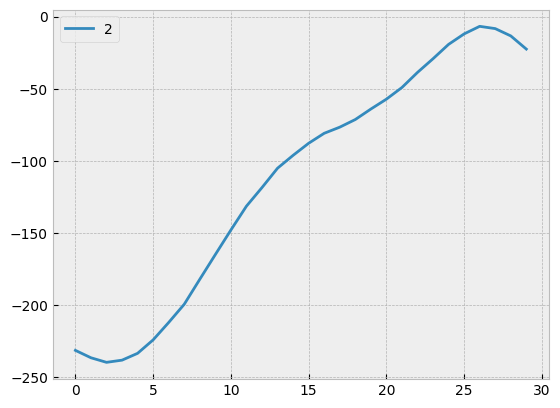

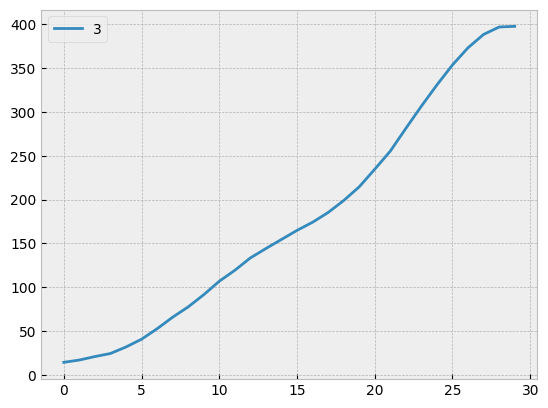

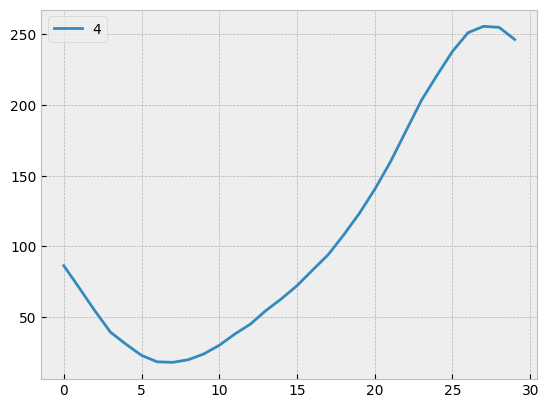

In [9]:
for i in range(M):
    plt.plot(Y[i], label=f"{i}")
    plt.legend()
    plt.show()

In [10]:
model = MAGMA(
    T=None,
    Y=Y,
    common_T=common_T,
    m0=m0, 
    theta0=theta0, 
    Theta=Theta, 
    Sigma=Sigma,
    common_hp_flag=True,
    save_history_flag=False,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [11]:
model.fit()

theta0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82572D+05    |proj g|=  2.31845D+17


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    1    f= -3.56845D+07    |proj g|=  7.74867D+16

At iterate    2    f= -3.78385D+07    |proj g|=  2.27278D+17
  ys=-4.643E+04  -gs= 3.012E+04 BFGS update SKIPPED

At iterate    3    f= -1.50805D+08    |proj g|=  1.73499D+18
  ys=-1.303E+10  -gs= 1.964E+09 BFGS update SKIPPED


LinAlgError: Singular matrix